## ISTA

The **Iterative Soft Thresholding Algorithm (ISTA)** is used for solving inverse problems where the solution is known to be sparse. For such problems it is common to use $\Vert \cdot \Vert _1$ as the regularization term in the Tikhonov functional: 
$$
J(x)=  \frac{1}{2} \| A x - y^\delta\|^2  + \alpha \Vert x \Vert _1.
$$

However for this case there is no closed formula as for $\Vert \cdot \Vert _2$. The necessary first order condition for a minimizer is given by
$$
0 \in A^T(Ax-y^\delta) + \alpha \partial \Vert x \Vert _1
$$

$$
x \in x+\lambda A^T(Ax-y^\delta) + \lambda \alpha \partial \Vert x \Vert _1 $$

$$
x - \lambda A^T(Ax-y^\delta)  \in x + \lambda \alpha \partial \Vert x \Vert _1.
$$

where $\partial$ represents the subgradient. The above equation is equivalent to
$$
S_{\lambda \alpha} \left(x - \lambda A^T(Ax-y^\delta)  \right) = x. 
$$

where $S_\varepsilon$ is the proximal operator of $\Vert \cdot \Vert _1$, which is the soft-thresholding function 

$$S_\varepsilon(x) = \text{sign}(x)\text{max}(0, |x|-\varepsilon)$$

Turning the fixed point condition into an iteration scheme and reorganizing the operands yields the ISTA iteration

$$
x^{k+1} = S_{\lambda \alpha} \left( (I - \lambda A^TA)x^k  + \lambda A^Ty^\delta  \right).
$$


## Exercise 1

Recall the integration operator $A:L^2\left(\left[0,1\right]\right)\rightarrow L^2\left(\left[0,1\right]\right)$

$$ (Ax)(t) = \int_0^{t}x(s) ds $$

discretized by the matrix

$$\tilde{A}=h \begin{bmatrix}
    \frac{1}{2}  & 0           & 0       & \cdots & 0           & 0          \\
    1            & \frac{1}{2} & 0       & \cdots & 0           & 0          \\
    \vdots       & \vdots      & \vdots  &        & \vdots      & \vdots     \\ 
    1            & 1           & 1       & \cdots & \frac{1}{2} & 0     \\ 
    1            & 1           & 1       & \cdots & 1           & \frac{1}{2}\\
\end{bmatrix}
$$


**a)** Create a sparse vector $x$. Create two plots one containing $x$ and the other one containing $y^\delta = Ax + \sigma\eta$ with $\eta \sim \mathcal{N}(0, 1)$ and $\sigma=10^{-3}$.

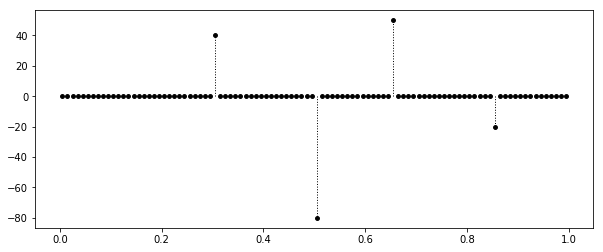

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def plot_solution(x_true, x_delta=None):  
    plt.scatter(s, x_true, marker='o', s=15, color='black')
    for i in range(len(s)):
        plt.plot([s[i], s[i]], [0, x_true[i]], linestyle=':', linewidth=1, color='black')
    
    if x_delta is not None:
        plt.scatter(s, x_delta, marker='o', s=15, color='red', facecolors='none', zorder=100)
    
    
N = 100
h = 1 / N
s = np.arange(h / 2, 1, h)

A = h * (np.tril(np.ones(N)) - (1 / 2) * np.diag(np.ones(N)))

x_true = np.zeros(N).reshape(-1, 1)
x_true[30] = 40
x_true[50] = -80
x_true[65] = 50
x_true[85] = -20


plt.figure(figsize=(10, 4))
plot_solution(x_true)

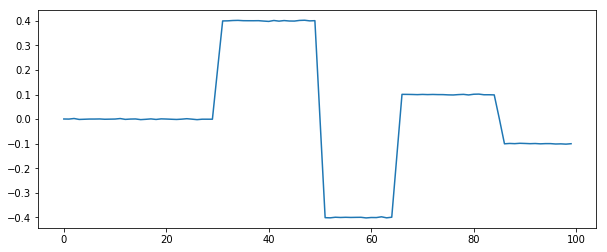

In [7]:
sigma = 0.001
y_delta = np.dot(A, x_true) + sigma*np.random.normal(size=x_true.shape)

plt.figure(figsize=(10, 4))
plt.plot(y_delta)

**b)** Try to reconstruct $x$ from $y^\delta$ using Tikhonov for different values of $\alpha$.

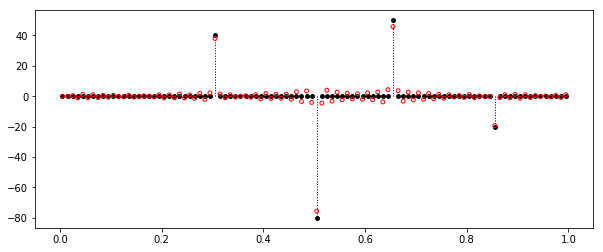

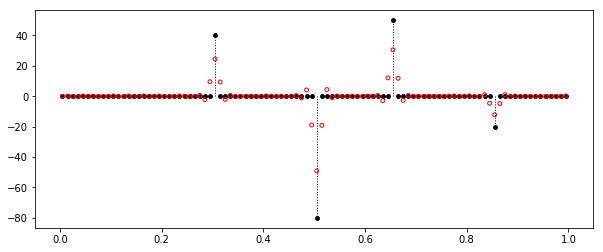

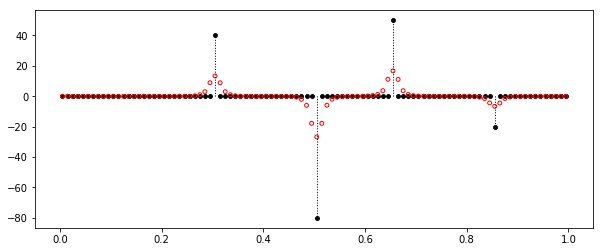

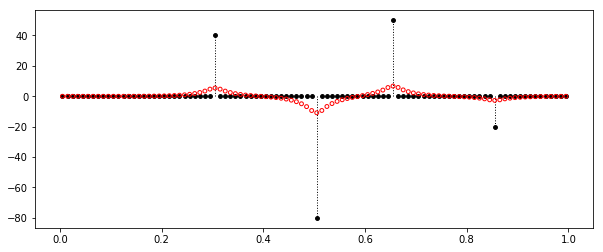

In [8]:
# Your code goes here !!!

def tikhonov(A, y, alpha):
    return np.dot(np.linalg.inv(np.dot(A.T, A) + alpha * np.diag([1] * len(y))), np.dot(A.T, y)) 


alphas = [1e-7, 1e-5, 1e-4, 1e-3]
       
for i in range(len(alphas)):
    plt.figure(figsize=(10, 4))
    
    alpha = alphas[i]    
    x_delta = tikhonov(A, y_delta, alpha)
    plot_solution(x_true, x_delta)

## Exercise 2

Implement the ISTA algorithm to solve the problem and use $\alpha=10^{-3},10^{-2},10^{-1}$.

In [ ]:
def ista(A, y, x0, alpha):
    tol = 1e-6
    lam = 1/(2*np.linalg.norm(A, 2)**2)
    
    W = np.eye(N) - lam * np.matmul(A.T, A)
    b = lam * np.dot(A.T, y_delta)

    def prox(x, eps):
        return np.sign(x) * np.maximum(np.abs(x) - eps, 0.)
        
    x = x0
    for i in range(200000):
        x = prox(np.dot(W, x) + b, alpha * lam)
    return x
        
alphas = [1e-3, 1e-2, 1e-1]

for i in range(len(alphas)):
    plt.figure(figsize=(10, 4))
    
    alpha = alphas[i]    
    x_delta = ista(A, y_delta, np.zeros(shape=x_true.shape),  alpha)
    plt.title(r'$\alpha={}$'.format(alpha))
    plot_solution(x_true, x_delta)